## Atividade N1 - Inteligência Artificial 2025.1

## Nome: Isabella Soares Couto

## RA: 081210006

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

O setor de qualidade de uma empresa fabricante de componentes eletrônicos contratou um engenheiro de computação para implantar um sistema automático de estimativa de valores de resistores. O processo de testes é baseado na Lei de Ohm, utilizando-se a equação $$V = RI,$$ em que $V$ é a tensão em (V) **aplicada** ao resistor, $I$ em (A) é a corrente elétrica **medida** e $R$ em (Ω) é o valor do resistor estimado pelo sistema que será desenvolvido pelo engenheiro de computação. A Figura 1 ilustra o processo de testes.

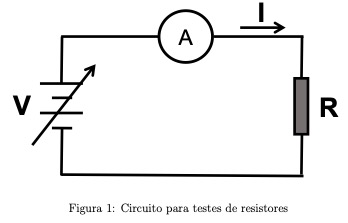

A Tabela 1 mostra as medições obtidas nos testes do resistor.

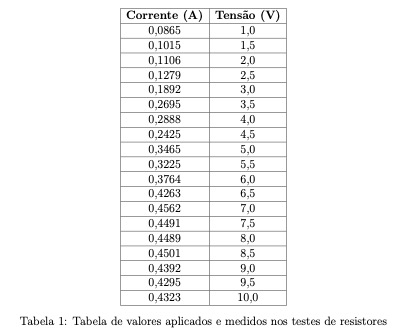

### Base de Dados:

In [3]:
#corrente
I = [0.0865,0.1015,0.1106,0.1279,0.1892,0.2695,0.2888,0.2425,0.3465,0.3225,0.3764,0.4263,0.4562,0.4491,0.4489,
     0.4501,0.4392,0.4295,0.4323]

#tensao
V = [1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0,8.5,9.0,9.5,10.0] 

In [4]:
len(I), len(V)

(19, 19)

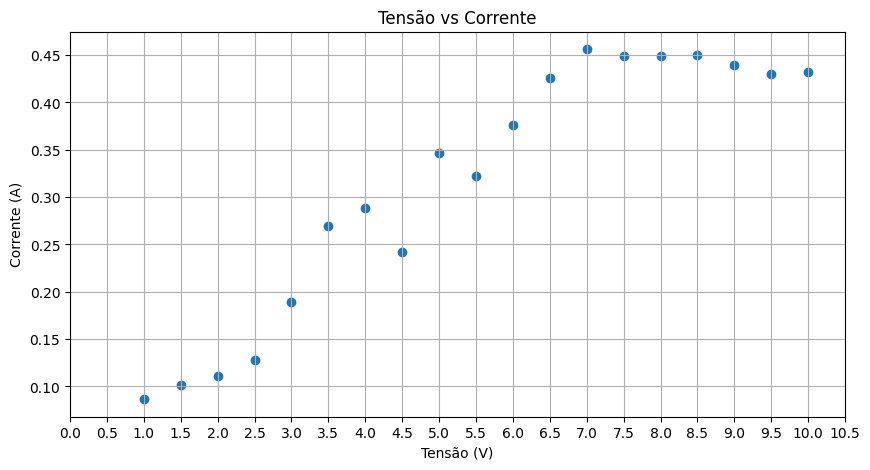

In [5]:
# Plotar distribuição dos dados
plt.figure(figsize=(10, 5))
plt.scatter(V, I)
plt.xlabel('Tensão (V)')
plt.xticks(np.arange(0, 11, 0.5))
plt.ylabel('Corrente (A)')
plt.title('Tensão vs Corrente')
plt.grid()
plt.show()

Diante das informações fornecidas pela empresa, o engenheiro de computação deve desenvolver uma solução utilizando, obrigatoriamente, **regressão linear aplicada com machine learning**, que, a partir das informações obtidas na Tabela 1, estime o valor do resistor $R$ em (Ω). 

A solução desenvolvida deve conter:

**(5,0 pontos) o algoritmo de machine learning, que implementa e informa o valor de $R$;**

_**V = R * I**_
 
_**fx = w * x + b**_

R = w

I = x

V = y

b = 0, não temos um coeficiente linear somando na fórmula original

# Solução utilizando algoritimo "from scratch"

Custo em 999 iterações = 17.72103962353217
w1 = 18.532638390659134 w0 = -0.3416299182158372


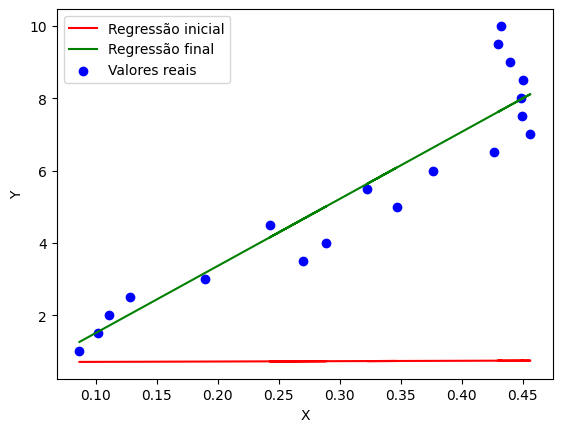

In [6]:
w1 = 0.1 # coeficiente angular (inclinação)
w0 = 0.7 # intercepto (onde a reta cruza o eixo y)
alpha = 0.01 # taxa de aprendizado
iteracoes = 1000 # número de iterações
costs = [] # lista para armazenar os valores da função custo

fig, ax = plt.subplots()
ax.plot(I, np.multiply(w1, I) + w0, 'r-', label='Regressão inicial')
ax.legend()
plt.ylabel('Y')
plt.xlabel('X')   

for i in range(iteracoes):
    Y_pred = np.multiply(w1, I) + w0  # previsão de Y
    Loss_error = (Y_pred - V)**2  # erro quadrático
    cost = np.sum(Loss_error)  # soma dos erros quadráticos
    
    # Gradientes
    dw0 = np.sum((Y_pred - V))  # derivada de w0
    dw1 = np.dot((Y_pred - V), I)  # derivada de w1
    
    costs.append(cost)  
    
    # Atualização dos coeficientes
    w1 = w1 - alpha * dw1
    w0 = w0 - alpha * dw0

    # Exibe os resultados na última iteração
    if i == (iteracoes - 1):
        print("Custo em", i, "iterações =", cost)
        print("w1 =", w1, "w0 =", w0)
        ax.plot(I, np.multiply(w1, I) + w0, 'g-', label='Regressão final')
        ax.scatter(I, V, color='blue', label='Valores reais')
        ax.legend(loc='best')
        plt.show()

In [7]:
print(f"R=> Valor estimado do resistor R: {w1:.3f} Ω")

R=> Valor estimado do resistor R: 18.533 Ω


# Solução utilizando Sklearn

In [8]:
# pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# Converte os dados para arrays numpy e redimensiona
I = np.array(I).reshape(-1, 1)
V = np.array(V).reshape(-1, 1)

In [10]:
# Cria o modelo de regressão linear
model = LinearRegression(fit_intercept=False)

In [11]:
# Treina o modelo
model.fit(I, V)

LinearRegression(fit_intercept=False)

In [12]:
model.coef_, model.intercept_

(array([[17.72988133]]), 0.0)

In [13]:
r = model.coef_[0]
round_r = np.round(r, 4)
print(f'Valor estimado do resistor R: {round_r} Ω')

Valor estimado do resistor R: [17.7299] Ω


**(1,0 ponto) o valor do parâmetro de tolerância do resistor $R$, justificando sua resposta.**

In [14]:
# Dados de resistências e suas tolerâncias típicas
resistencias = np.array([10, 15, 22, 33, 47, 68, 100, 150, 220, 330, 470, 680,
                         1000, 1500, 2200, 3300, 4700, 6800, 10000, 15000, 22000, 33000, 47000, 68000,
                         100000, 150000, 220000, 330000, 470000, 680000, 1000000, 1500000, 2200000, 3300000])  # Ω

tolerancias = np.array([20, 20, 20, 20, 20, 20, 10, 10, 10, 10, 10, 10,
                        5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2,
                        1, 1, 1, 1, 1, 1, 0.5, 0.5, 0.5, 0.5])  # %

# Treinamento do modelo
X = resistencias.reshape(-1, 1)
y = tolerancias
modelo = LinearRegression()
modelo.fit(X, y)

# Predição para 18.533 Ω
R_novo = np.array([[18.533]])
T_predito = modelo.predict(R_novo)

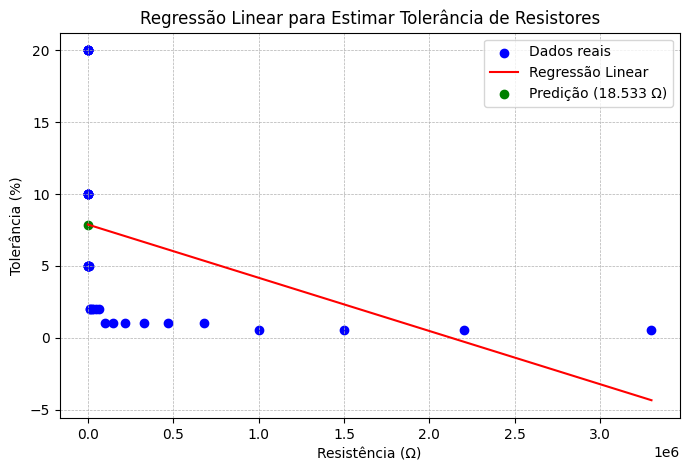

In [15]:
# Plot dos dados e da regressão
plt.figure(figsize=(8, 5))
plt.scatter(resistencias, tolerancias, color='blue', label="Dados reais")
plt.plot(resistencias, modelo.predict(X), color='red', label="Regressão Linear")
plt.scatter(R_novo, T_predito, color='green', label="Predição (18.533 Ω)")
plt.xlabel("Resistência (Ω)")
plt.ylabel("Tolerância (%)")
plt.legend()
plt.title("Regressão Linear para Estimar Tolerância de Resistores")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

In [16]:
print(f"R=> Estimativa da tolerância para 18.533 Ω: {T_predito[0]:.2f} %")

R=> Estimativa da tolerância para 18.533 Ω: 7.87 %


Sendo a regressão linear a solução de machine learning mais indicada para estimar o valor de $R$,

**(1,0 ponto) o coeficiente da regressão linear chamado de intercept deve ser considerado na execução do algoritmo? Justifique sua resposta;**

R => A fórmula que descreve a tensão aplicada ao resistor não possui um coeficiente linear (b) e é dada por V = R * I. Portanto, o valor do resistor R é o coeficiente angular da regressão linear e por isso não deve ser considerado na execução do modelo.

**(1,0 ponto) qual é a precisão aproximada para utilizar-se o menor número de iterações na execução da aplicação, tendo como base o custo ou erro obtido em cada iteração? Justifique sua resposta.**

R=> Com base na análise do gráfico a seguir, a partir da vigésima iteração o modelo atinge o valor de custo próximo ao custo minimo.

w =  18.532638390659134 & b =  0


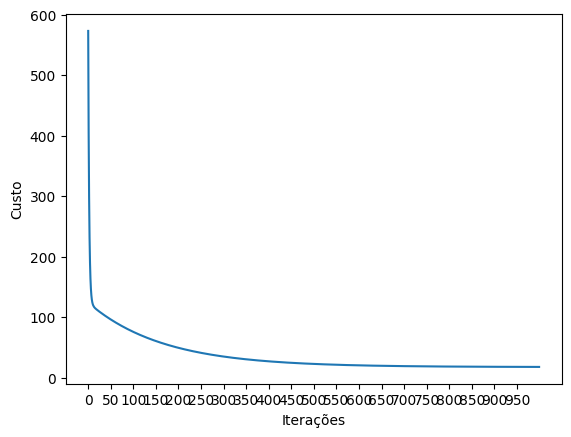

In [17]:
print("w = ", w1,"& b = ", 0)
plt.plot(costs)
plt.xticks(np.arange(0, 1000, 50))
plt.ylabel('Custo')
plt.xlabel('Iterações')
plt.show()

Analisando o problema e a solução desenvolvida, considerando os aspectos da engenharia e da física envolvidos, descreva e justifique

**(2,0 pontos) uma recomendação de melhoria no processo da empresa.**

R => A partir do seguinte gráfico de Tensão vs Corrente, podemos analisar que os dados a partir de aproximadamente V = 7 não seguem uma relação linear, o que é esperado para um resistor ôhmico. A resistência não permanece constante. Uma recomendação seria testar um modelo mais complexo para essa distribuição como um modelo polinomial para capturar a não linearidade dos dados.

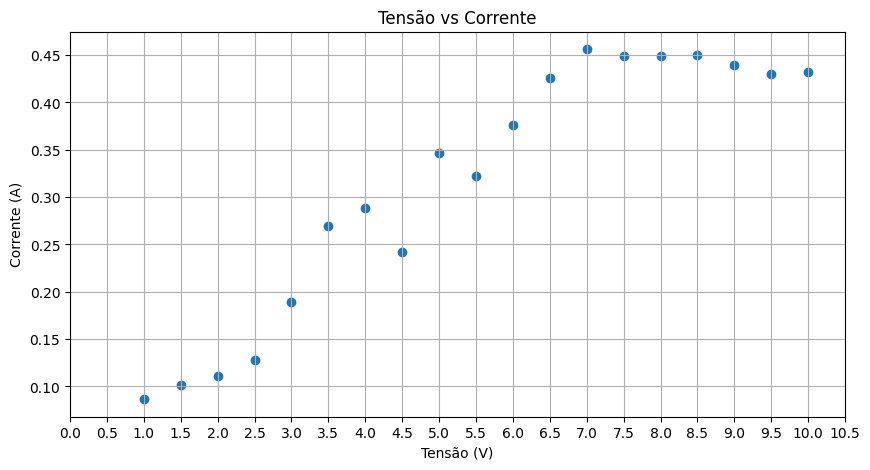

In [18]:
# Plotar distribuição dos dados
plt.figure(figsize=(10, 5))
plt.scatter(V, I)
plt.xlabel('Tensão (V)')
plt.xticks(np.arange(0, 11, 0.5))
plt.ylabel('Corrente (A)')
plt.title('Tensão vs Corrente')
plt.grid()
plt.show()